In [1]:
import pandas as pd

df = pd.read_csv("../data/inventors_inventions.csv")


In [2]:
import networkx as nx

B = nx.Graph()

# Ajouter les nœuds avec leur type
B.add_nodes_from(df['inventor'], bipartite=0)
B.add_nodes_from(df['invention'], bipartite=1)

# Ajouter les arêtes entre inventeurs et inventions
edges = list(zip(df['inventor'], df['invention']))
B.add_edges_from(edges)


In [3]:
# Noeuds inventeurs seulement
inventors = df['inventor'].unique()
G = nx.bipartite.weighted_projected_graph(B, inventors)


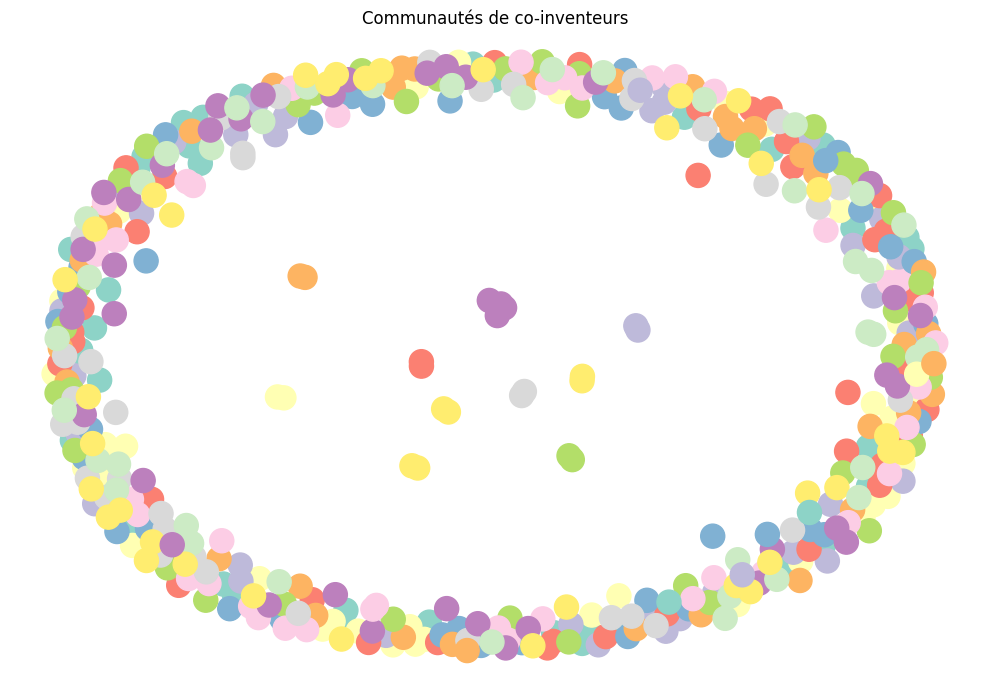

In [4]:
import community as community_louvain  # pip install python-louvain
import matplotlib.pyplot as plt

# Calcul des communautés
partition = community_louvain.best_partition(G)

# Affichage du graphe avec couleurs de communautés
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap=plt.cm.Set3, node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Communautés de co-inventeurs")
plt.axis("off")
plt.tight_layout()
plt.show()
